# TP Flyback

In [30]:
Vd=300
Vdi = 1.25
Vo2=5
Vo3=16

AL=4000e-9
Amin=136.8e-6 #en m^2
Ae=153e-6 #en m^2

# Miguelímetro
D=0.35
Fs=100e3
Bmax=0.2

Idc=0.08

# import complex math module  
import cmath  
a =  Idc*AL/Amin
b = -Bmax
c = (Vd*D)/(2*Fs*Amin)
  
# calculate the discriminant  
d = (b**2) - (4*a*c)  

Nmin = (-b-cmath.sqrt(d))/(2*a)  
Nmax = (-b+cmath.sqrt(d))/(2*a)  

if(d<0):
    print('No hay solucion a la cuadratica')
else:
# find two solutions  
    print('Nmin = {0} ;\t Nmax = {1}'.format(Nmin.real,Nmax.real))


Nmin = 29.077491086124684 ;	 Nmax = 56.42250891387532


Relación de vueltas

In [31]:
import pandas as pd
import numpy as np

# Al = 4000E-9
# Vd = 300
# Vo2 = 5
# Vo3 = 16
D_mean = D

def save_turns(Vd, Vo2, Vo3, D_mean, N1, Al, dataframe):
    N2 = N1*((Vo2+Vdi)/Vd)*(1-D_mean)/(D_mean)
    N3 = N1*((Vo3+Vdi)/Vd)*(1-D_mean)/(D_mean)

    N2_norm = np.round(N2)
    N3_norm = np.round(N3)

    Vo2_norm = Vd*(N2_norm/N1)*(D_mean/(1-D_mean))-Vdi
    Vo3_norm = Vd*(N3_norm/N1)*(D_mean/(1-D_mean))-Vdi

    err2 = abs(Vo2-Vo2_norm)*100/Vo2
    err3 = abs(Vo3-Vo3_norm)*100/Vo3

    # add row to the DataFrame
    # dataframe.loc[len(dataframe)] = [Vd, Vo2, Vo3, '|', N1, L1*1E3, N2, L2*1E3, N3, L3*1E3, '-->', N2_norm, L2_norm*1E3, '|', N3_norm, L3_norm*1E3, '|', Vo2_norm, Vo3_norm]
    dataframe.loc[len(dataframe)] = [Vd, Vo2, Vo3, '|', N1, '|', N2_norm, '|', N3_norm, '|', Vo2_norm, err2, Vo3_norm, err3]
    return dataframe


# create an empty DataFrame
# df = pd.DataFrame(columns=['Vd', 'Vo2', 'Vo3', '|', 'N1', 'L1[mHy]', 'N2', 'L2[mHy]', 'N3', 'L3[mHy]', 'Normalizamos...', 'N2_norm', 'L2_norm[mHy]', '|', 'N3_norm', 'L3_norm[mHy]', '|', 'Vo2_norm', 'Vo3_norm'])
df = pd.DataFrame(columns=['Vd', 'Vo2', 'Vo3', '|', 'N1', '|', 'N2_norm', '|', 'N3_norm', '|', 'Vo2_norm', 'error 2', 'Vo3_norm', 'error 3'])

# add some rows to the DataFrame

# create an XML file from the DataFrame
for N1 in range(round(Nmin.real)+1, round(Nmax.real), 1):
    df = save_turns(Vd, Vo2, Vo3, 0.35, N1, AL, df)

print(df.to_string(index=True, max_colwidth=20, float_format='%.3f'))

     Vd  Vo2  Vo3  |  N1  |  N2_norm  |  N3_norm  |  Vo2_norm  error 2  Vo3_norm  error 3
0   300    5   16  |  30  |    1.000  |    3.000  |     4.135   17.308    14.904    6.851
1   300    5   16  |  31  |    1.000  |    3.000  |     3.961   20.782    14.383   10.108
2   300    5   16  |  32  |    1.000  |    3.000  |     3.798   24.038    13.894   13.161
3   300    5   16  |  33  |    1.000  |    4.000  |     3.645   27.098    18.330   14.565
4   300    5   16  |  34  |    1.000  |    4.000  |     3.501   29.977    17.755   10.966
5   300    5   16  |  35  |    1.000  |    4.000  |     3.365   32.692    17.212    7.572
6   300    5   16  |  36  |    1.000  |    4.000  |     3.237   35.256    16.699    4.367
7   300    5   16  |  37  |    1.000  |    4.000  |     3.116   37.682    16.214    1.335
8   300    5   16  |  38  |    1.000  |    4.000  |     3.001   39.980    15.754    1.537
9   300    5   16  |  39  |    2.000  |    4.000  |     7.034   40.680    15.318    4.262
10  300   

In [32]:
idx = 20

N1=df.N1[idx]
N2=df.N2_norm[idx]
N3=df.N3_norm[idx]

N1_N2=N1/N2 #((Vd/Vo2)+Vdi)*D/(1-D)
print("Relación de vueltas entre N1 y N2 = " + str(N1_N2))

N1_N3=N1/N3 #((Vd/Vo3)+Vdi)*D/(1-D)
print("Relación de vueltas entre N1 y N3 = " + str(N1_N3))


print('N1 = {0} ;\t N2 = {1} ;\t N3 = {2}'.format(N1, N2, N3))
I2 = Idc*(N1/N2)
I3 = Idc*(N1/N3)

Io2 = Idc*(N1/N2)*(1-D)
Io3 = Idc*(N1/N3)*(1-D)



B = a*N1 + c/N1
print('Corriente en los bobinados del transformador:\n\tI1 = {0}A ;\t I2 = {1}A ;\t I3 = {2}A'.format(Idc, round(I2, 3), round(I3, 3)))
print('Corriente a las salidas de las flyback\n\tIo2 = {1}A ;\t Io3 = {2}A'.format(Idc, round(Io2, 3), round(Io3, 3)))
print('\nB = {0}mH'.format(round(B*1e3, 3)))

Relación de vueltas entre N1 y N2 = 25.0
Relación de vueltas entre N1 y N3 = 10.0
N1 = 50 ;	 N2 = 2.0 ;	 N3 = 5.0
Corriente en los bobinados del transformador:
	I1 = 0.08A ;	 I2 = 2.0A ;	 I3 = 0.8A
Corriente a las salidas de las flyback
	Io2 = 1.3A ;	 Io3 = 0.52A

B = 193.713mH


Inductancias de los bobinados

In [33]:
Lmag = AL*pow(N1, 2)
L2 = AL*pow(N2, 2)
L3 = AL*pow(N3, 2)

print('L2 = {0}uH\tL3 = {1}uH'.format(round(L2*1e6, 3), round(L3*1e6, 3)))
print('Lmag = L1 = {0}mH\nLd1 = {1}uH'.format(round(Lmag*1e3, 3), round(Lmag*0.1*1e6, 3)))

L2 = 16.0uH	L3 = 100.0uH
Lmag = L1 = 10.0mH
Ld1 = 1000.0uH


Resistencias de los bobinados

In [34]:
AR=32.5e-6

Rcu1=AR*pow(N1, 2)
Rcu2=AR*pow(N2, 2)
Rcu3=AR*pow(N3, 2)

print('Rcu1 = {0}m ;\t Rcu2 = {1}m ;\t Rcu3 = {2}m'.format(round(Rcu1*1e3, 2), round(Rcu2*1e3, 2), round(Rcu3*1e3, 2)))

Rcu1 = 81.25m ;	 Rcu2 = 0.13m ;	 Rcu3 = 0.81m


Efecto skin y seccion de cable

In [35]:
import math

Aw=120 # en mm^2
Kw=0.5

skineff=66/cmath.sqrt(Fs).real

Scu=(Aw*Kw)/N1

print('Skin depth = {0} --> sección = {1} --> diametro = {2}'.format(skineff, math.pi*pow(skineff/2, 2), 2*skineff))

n_paralelo = lambda d: math.ceil(pow(2*skineff/d, 2))


s03=pow((0.35)/2, 2)*cmath.pi
s06=pow((0.6)/2, 2)*cmath.pi

j1=Idc/(s03*2)
j2=Io2/(s06*2)
j3=Io3/(s03*2)
print(j1)
print(j2)
print(j3)

K1=s03*2*N1/Aw
K2=s06*2*N2/Aw
K3=s03*2*N3/Aw
print('K1 = {0} ;\t K2 = {1} ;\t K3 = {2}\n Ktotal = {3}'.format(K1, K2, K3, K1+K2+K3))

Skin depth = 0.20871032557111302 --> sección = 0.03421194399759284 --> diametro = 0.41742065114222604
0.4157516880767879
2.2989047335495996
2.7023859724991213
K1 = 0.0801760625134895 ;	 K2 = 0.00942477796076938 ;	 K3 = 0.00801760625134895
 Ktotal = 0.09761844672560782


Mediciones

In [36]:
L1_med=13.25e-3
L2_med=21.95e-6
L3_med=133.7e-6

Al_calc = lambda L, N : L/(pow(N, 2))

# print(Al_calc(L1_med, N1))
# print(Al_calc(L2_med, N2))
# print(Al_calc(L3_med, N3))

Al_mid = (Al_calc(L1_med, N1) + Al_calc(L2_med, N2) + Al_calc(L3_med, N3)) /3

print('Aumento del {0}% respecto del AL original ({1} vs {2})'.format(round((Al_mid/AL -1) *100, 2), Al_mid, AL))

Aumento del 34.46% respecto del AL original (5.3785e-06 vs 4e-06)


Salida respecto de entrada

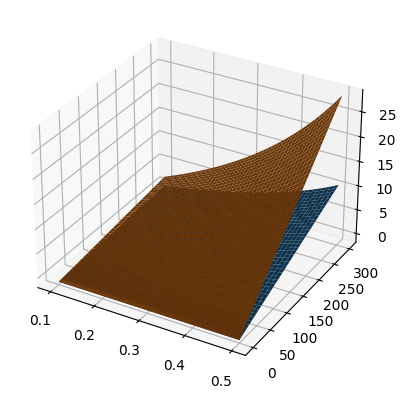

In [50]:
import numpy as np
import matplotlib.pyplot as plt

V5_Vd = lambda Vin : Vin*(N2/N1)*(D/(1-D))-Vdi

V5_D = lambda dc : Vd*(N2/N1)*(dc/(1-dc))-Vdi

V5_3d = lambda dc, Vin : Vin*(N2/N1)*(dc/(1-dc))-Vdi

V16_3d = lambda dc, Vin : Vin*(N3/N1)*(dc/(1-dc))-Vdi

Vd_x = np.linspace(0, 300, 301)
D_x = np.linspace(0.1, 0.5, 301)

Vd_x, D_x = np.meshgrid(Vd_x, D_x)

ax = plt.figure().add_subplot(projection='3d')

# Plot a sin curve using the x and y axes.
ax.plot_surface(D_x, Vd_x, V5_3d(D_x, Vd_x))
ax.plot_surface(D_x, Vd_x, V16_3d(D_x, Vd_x))
plt.show()